# Modélisation

In [1]:
import pandas as pd
%pylab inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.compat import lzip
import scipy.stats as stats
import statsmodels.tools.tools as sma
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Import et aperçu des données

In [2]:
df = pd.read_csv('df2.csv', index_col=['OSEBuildingID'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 1 to 32429
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   YearBuilt                              1540 non-null   int64  
 1   BuildingType                           1540 non-null   object 
 2   NumberofBuildings                      1540 non-null   float64
 3   NumberofFloors                         1540 non-null   int64  
 4   ENERGYSTARScore                        1540 non-null   float64
 5   PrimaryPropertyType                    1540 non-null   object 
 6   PropertyGFABuilding(s)                 1540 non-null   int64  
 7   Neighborhood                           1540 non-null   object 
 8   Latitude                               1540 non-null   float64
 9   Longitude                              1540 non-null   float64
 10  ComplianceStatus                       1540 non-null   object 
 11  Tot

Le jeu de données ne contient **pas de valeur manquante**.

In [4]:
df.head()

,YearBuilt,BuildingType,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PrimaryPropertyType,PropertyGFABuilding(s),Neighborhood,Latitude,Longitude,ComplianceStatus,TotalGHGEmissions,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf)_mean_property_type,SiteEUI(kBtu/sf)_mean_property_type,SteamUse(kBtu)_mean_property_type,Electricity(kBtu)_mean_property_type,NaturalGas(kBtu)_mean_property_type
OSEBuildingID,,,,,,,,,,,,,,,,,,
1,1927,NonResidential,1.0,12,60.0,Hotel,88434,DOWNTOWN,47.61220,-122.33799,Compliant,5.525373,15.793246,5.058509,4.323459,3.243963,15.007775,14.204702
2,1996,NonResidential,1.0,11,61.0,Hotel,88502,DOWNTOWN,47.61317,-122.33393,Compliant,5.693261,15.942305,5.058509,4.323459,3.243963,15.007775,14.204702
3,1969,NonResidential,1.0,41,43.0,Hotel,759392,DOWNTOWN,47.61393,-122.33810,Compliant,7.645053,18.100297,5.058509,4.323459,3.243963,15.007775,14.204702
5,1926,NonResidential,1.0,10,56.0,Hotel,61320,DOWNTOWN,47.61412,-122.33664,Compliant,5.660979,15.731637,5.058509,4.323459,3.243963,15.007775,14.204702
8,1980,NonResidential,1.0,18,75.0,Hotel,113580,DOWNTOWN,47.61375,-122.34047,Compliant,6.226556,16.466822,5.058509,4.323459,3.243963,15.007775,14.204702


In [5]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,PropertyGFABuilding(s),Latitude,Longitude,TotalGHGEmissions,SiteEnergyUse(kBtu),SourceEUI(kBtu/sf)_mean_property_type,SiteEUI(kBtu/sf)_mean_property_type,SteamUse(kBtu)_mean_property_type,Electricity(kBtu)_mean_property_type,NaturalGas(kBtu)_mean_property_type
count,1540.000000,1540.000000,1540.000000,1540.000000,1.540000e+03,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000
mean,1961.230519,1.036364,4.285065,63.838225,9.730801e+04,47.616182,-122.333425,3.958613,14.888098,4.859667,3.983458,1.047281,14.415170,9.571629
std,32.877953,0.569967,6.795531,23.334544,1.652166e+05,0.046859,0.023225,1.453374,1.375273,0.499001,0.487324,0.898867,0.767402,2.232325
min,1900.000000,0.000000,0.000000,1.000000,3.636000e+03,47.509590,-122.411820,0.000000,0.000000,3.580240,2.753690,0.000000,12.742502,6.220422
25%,1929.000000,1.000000,1.000000,60.000000,2.768750e+04,47.587708,-122.342765,3.022739,14.004393,4.749691,3.931269,0.273111,13.624607,7.016811
50%,1965.000000,1.000000,2.000000,63.861692,4.507500e+04,47.612380,-122.333160,3.902276,14.777742,5.026972,4.019540,1.442825,14.472564,10.123289
75%,1988.000000,1.000000,4.000000,79.000000,9.284900e+04,47.648715,-122.322612,4.933266,15.759488,5.058509,4.271479,1.442825,14.967206,10.814406
max,2015.000000,9.000000,99.000000,100.000000,1.765970e+06,47.733870,-122.261800,9.418018,19.495993,6.133918,5.389167,3.635655,16.939583,14.455184


## Nettoyage

In [6]:
# Changement de type, d'objet à category

df['PrimaryPropertyType'] = df.PrimaryPropertyType.astype('category')
df['Neighborhood'] = df.Neighborhood.astype('category')

In [7]:
# Cette information est déjà comprise dans latitude et longitude

df.drop(['Neighborhood'], axis=1, inplace=True)

## Sélection des données

In [8]:
# Création de variables pour les target et les features

y1 = df.loc[:,'TotalGHGEmissions']
y2 = df.loc[:,"SiteEnergyUse(kBtu)"]
X = df

In [9]:
# Création d'un jeu train/test en stratifiant les données en fonction de PrimaryPropertyType

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=19)
for train_index, test_index in sss.split(X, y= df['PrimaryPropertyType']):
    strat_train = X.iloc[train_index]
    strat_test = X.iloc[test_index]

In [10]:
# Copie du jeu de données test pour l'analyse des erreurs

strat_analysis = strat_test.copy()

In [11]:
# Nombre de Folds de cross validation

cv = 5

In [12]:
# Suppression de features non-utiles pour le modèle
# Ces features ont été estimés non-utiles suite à un processus iteratif

for x in [strat_train, strat_test]:
    x.drop(['PrimaryPropertyType', 'BuildingType'], axis=1, inplace=True)

C:\Users\jerem\Miniconda3\envs\jvds\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
# Création des sous-catégories du train/test set

y2_train = strat_train.loc[:,"SiteEnergyUse(kBtu)"]
y2_test = strat_test.loc[:,"SiteEnergyUse(kBtu)"]

y1_train = strat_train.loc[:,'TotalGHGEmissions']
y1_test = strat_test.loc[:,'TotalGHGEmissions']

X_train = strat_train.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 'ENERGYSTARScore'], axis=1)
X_test = strat_test.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 'ENERGYSTARScore'], axis=1)

X_train_ess = strat_train.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
X_test_ess = strat_test.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)

## Fonctions

In [14]:
# Learning curves

def LearningCurvePlot(estimator=None, X=X, y=y1, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5)) :
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label = 'Training score')
    plt.plot(train_sizes, test_scores_mean, label = 'Test score')
    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()

In [15]:
# Mesure et sauvegarde de la performance des modèles

RMSE = []
R2 = [] 

def Score(model=None, X=None, y=None, save=1):
    pred = model.predict(X)
    print('R² : ' +  str(metrics.r2_score(y, pred)))
    print('RMSE : ' +  str(np.sqrt(metrics.mean_squared_error(y, pred))))
    if save == 1:
        R2.append(metrics.r2_score(y, pred))
        RMSE.append(np.sqrt(metrics.mean_squared_error(y, pred)))

In [16]:
# Importance des features des tree-bases modèles

def FeatureImportance(data=X_train_ess, model=None, size=(7,8), legend='lower right') :
    features = pd.get_dummies(data).columns
    importance = model.feature_importances_
    fi = pd.DataFrame({'features': features, 'importance' : importance}).set_index('features').sort_values(by='importance')

    fig, ax = plt.subplots()
    fig.set_size_inches(size)
    fi.plot(kind='barh', ax=ax)
    plt.legend(loc='lower right')
    plt.show()

In [17]:
# Erreur par type de propriété

def ComputeError(model=None, test_data=X_test, target=y2_test) :
    pred = model.predict(test_data)
    error = target - pred
    strat_analysis['error'] = np.abs(error)
    return strat_analysis.groupby('PrimaryPropertyType')['error'].mean().sort_values()

In [18]:
# Plot des scores par modèle

def PlotScore(indicator='RMSE', data=None, size=(7,5), starting=0.55):
    fig, ax = plt.subplots()
    fig.set_size_inches(size)
    sns.barplot(data=data, x=indicator, y=data.index, hue='ESS', ax=ax)
    ax.set_ylabel('Modèles')
    ax.set_xlim(xmin=starting)
    ax.legend(loc='upper right')
    plt.grid()
    plt.show()

## Création des pipelines

In [19]:
# Sélection des subsets de features

num_a = list(X_train.select_dtypes(['int64', 'float64']).columns)
cat = make_column_selector(dtype_exclude=np.number)
log = ['PropertyGFABuilding(s)', 'NumberofBuildings', 'NumberofFloors']
num_b = list(X_train_ess.select_dtypes(['int64', 'float64']).columns)
log_ess = ['PropertyGFABuilding(s)', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore']

In [20]:
# Je retire les variables de cette liste car elles doivent être transformé en log et avec standard scaler

for x in log :
    num_a.remove(x)

In [21]:
# Je retire les variables de cette liste car elles doivent être transformé en log et avec standard scaler

for x in log_ess :
    num_b.remove(x)

In [22]:
# Transformation log + std
std_log = make_pipeline(FunctionTransformer(func=np.log1p), StandardScaler())

# Transformation std
std = make_pipeline(StandardScaler())

# Transformation des variables catégorielles avec one hot encode
one_hot = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

# Pipeline pour les modèles avec ESS
preprocessor_a = make_column_transformer((std_log, log),                                        
                                       (one_hot, cat),
                                       (std, num_a)
                                      )

# Pipeline pour les modèles sans ESS
preprocessor_b = make_column_transformer((std_log, log_ess),                                        
                                       (one_hot, cat),
                                       (std, num_b)
                                      )

## Baseline : Dummy regressor

Création d'une baseline afin de comparer la performance des modèles à une méthode naïve.

### Target 1

In [23]:
dum = DummyRegressor(strategy='mean')
dummy_reg = make_pipeline(preprocessor_a,
                        dum)
dummy_reg.fit(X_train, y1_train)
Score(model=dummy_reg, X=X_test, y=y1_test)

R² : -0.0016106502276926893
RMSE : 1.5376689435669264


### Target 2

In [24]:
dummy_reg.fit(X_train, y2_train)
Score(model=dummy_reg, X=X_test, y=y2_test)

R² : -6.50766112275658e-05
RMSE : 1.5824497087544938


## Regression linéaire

### Target 1 sans EnergyStar Score (ESS)

In [25]:
model_1_a = make_pipeline(preprocessor_a,
                        LinearRegression())

model_1_a.fit(X_train, y1_train)
Score(model=model_1_a, X=X_test, y=y1_test)

R² : 0.5746287957809773
RMSE : 1.0020685210514988


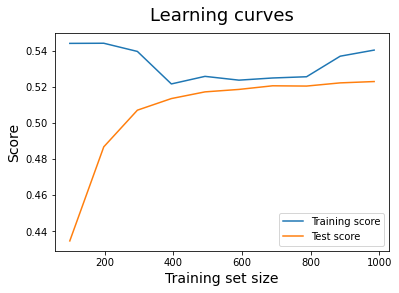

In [26]:
LearningCurvePlot(estimator=model_1_a, X=X_train, y=y1_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

### Target 1 avec EnergyStar Score (ESS)

In [27]:
model_1_b = make_pipeline(preprocessor_b,
                        LinearRegression())

In [28]:
model_1_b.fit(X_train_ess, y1_train)
Score(model=model_1_b, X=X_test_ess, y=y1_test)

R² : 0.5982178726573081
RMSE : 0.9738872564822783


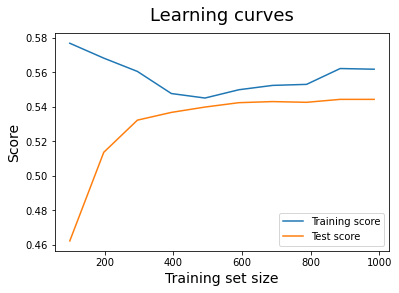

In [29]:
LearningCurvePlot(estimator=model_1_b, X=X_train_ess, y=y1_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

### Target 2 sans EnergyStar Score (ESS)

In [30]:
model_1_c = make_pipeline(preprocessor_a,
                        LinearRegression())

model_1_c.fit(X_train, y2_train)
Score(model=model_1_c, X=X_test, y=y2_test)

R² : 0.5852590408365652
RMSE : 1.0190705470081267


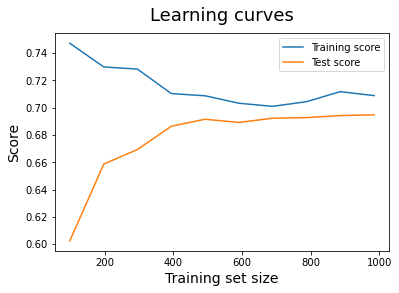

In [31]:
LearningCurvePlot(estimator=model_1_c, X=X_train_ess, y=y2_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

### Target 2 avec EnergyStar Score (ESS)

In [32]:
model_1_d = make_pipeline(preprocessor_b,
                        LinearRegression())
model_1_d.fit(X_train_ess, y2_train)
Score(model=model_1_d, X=X_test_ess, y=y2_test)

R² : 0.6136522172527565
RMSE : 0.9835693756084735


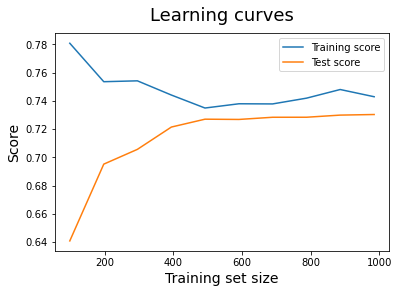

In [33]:
LearningCurvePlot(estimator=model_1_d, X=X_train_ess, y=y2_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

## Lasso

In [34]:
model_2_a = make_pipeline(preprocessor_a,
                        Lasso(random_state=0))

### Target 1 sans EnergyStar Score (ESS)

In [35]:
# valeurs du paramètre C
alpha_range = np.logspace(-3, 3, 10)

parametersGrid = {"lasso__max_iter": [10000],
                  "lasso__alpha": alpha_range
                 }

grid_model_2_a = GridSearchCV(model_2_a, param_grid=parametersGrid, scoring='r2', cv=cv)

grid_model_2_a.fit(X_train, y1_train)
Score(model=grid_model_2_a, X=X_test, y=y1_test)

R² : 0.5746422458444929
RMSE : 1.0020526784278507


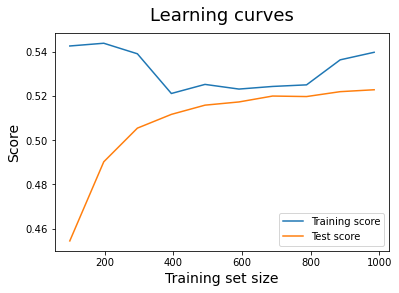

In [36]:
model_2_a = grid_model_2_a.best_estimator_
LearningCurvePlot(estimator=model_2_a, X=X_train, y=y1_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

In [37]:
# liste des coefficients associés aux features

coef_lasso = model_2_a[1].coef_
coef = pd.DataFrame({'features' : pd.get_dummies(X_train).columns, 'coefs' : coef_lasso})
coef.sort_values('coefs', ascending=False)

,features,coefs
10,NaturalGas(kBtu)_mean_property_type,1.527322
0,YearBuilt,0.824314
3,PropertyGFABuilding(s),0.519850
11,ComplianceStatus_Compliant,0.116515
13,ComplianceStatus_Non-Compliant,0.058373
1,NumberofBuildings,0.057067
6,SourceEUI(kBtu/sf)_mean_property_type,0.028426
8,SteamUse(kBtu)_mean_property_type,0.004421
4,Latitude,0.000000
12,ComplianceStatus_Error - Correct Default Data,-0.013927


### Target 1 avec EnergyStar Score (ESS)

In [38]:
model_2_b = make_pipeline(preprocessor_b,
                        Lasso(random_state=0))

In [39]:
# valeurs du paramètre C
alpha_range = np.logspace(-3, 2, 10)

parametersGrid = {"lasso__max_iter": [10000],
                  "lasso__alpha": alpha_range
                 }

grid_model_2_b = GridSearchCV(model_2_b, param_grid=parametersGrid, scoring='r2', cv=cv)

grid_model_2_b.fit(X_train_ess, y1_train)
Score(model=grid_model_2_b, X=X_test_ess, y=y1_test)

R² : 0.5978491677956881
RMSE : 0.9743340093373897


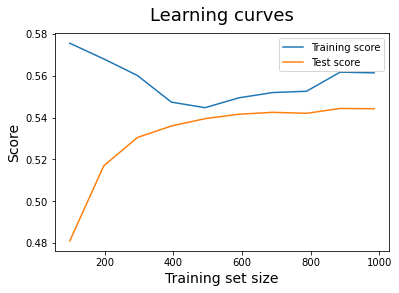

In [40]:
model_2_b = grid_model_2_b.best_estimator_
LearningCurvePlot(estimator=model_2_b, X=X_train_ess, y=y1_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

In [41]:
# liste des coefficients associés aux features

coef_lasso = model_2_b[1].coef_
coef = pd.DataFrame({'features' : pd.get_dummies(X_train_ess).columns, 'coefs' : coef_lasso})
coef.sort_values('coefs', ascending=False)

,features,coefs
11,NaturalGas(kBtu)_mean_property_type,1.480201
0,YearBuilt,0.839087
4,PropertyGFABuilding(s),0.398562
12,ComplianceStatus_Compliant,0.132420
1,NumberofBuildings,0.059880
14,ComplianceStatus_Non-Compliant,0.043704
7,SourceEUI(kBtu/sf)_mean_property_type,0.012737
9,SteamUse(kBtu)_mean_property_type,0.012431
5,Latitude,0.000000
2,NumberofFloors,-0.024702


### Target 2 sans EnergyStar Score (ESS)

In [42]:
# valeurs du paramètre C
alpha_range = np.logspace(-3, 1, 12)

parametersGrid = {"lasso__max_iter": [10000],
                  "lasso__alpha": alpha_range
                 }

grid_model_2_c = GridSearchCV(model_2_a, param_grid=parametersGrid, scoring='r2', cv=cv)

grid_model_2_c.fit(X_train, y2_train)
Score(model=grid_model_2_c, X=X_test, y=y2_test)

R² : 0.5776120995868316
RMSE : 1.0284223837078443


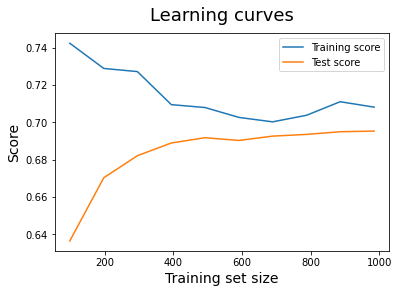

In [43]:
model_2_c = grid_model_2_c.best_estimator_
LearningCurvePlot(estimator=model_2_c, X=X_train, y=y2_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

In [44]:
coef_lasso = model_2_c[1].coef_
coef = pd.DataFrame({'features' : pd.get_dummies(X_train).columns, 'coefs' : coef_lasso})
coef.sort_values('coefs', ascending=False)

,features,coefs
0,YearBuilt,0.850800
3,PropertyGFABuilding(s),0.553800
10,NaturalGas(kBtu)_mean_property_type,0.502111
6,SourceEUI(kBtu/sf)_mean_property_type,0.117584
1,NumberofBuildings,0.041505
2,NumberofFloors,0.038806
11,ComplianceStatus_Compliant,0.023170
13,ComplianceStatus_Non-Compliant,0.003975
8,SteamUse(kBtu)_mean_property_type,0.000224
4,Latitude,-0.000000


### Target 2 avec EnergyStar Score (ESS)

In [45]:
# valeurs du paramètre C
alpha_range = np.logspace(-3, 2, 5)

parametersGrid = {"lasso__max_iter": [10000],
                  "lasso__alpha": alpha_range
                 }

grid_model_2_d = GridSearchCV(model_2_b, param_grid=parametersGrid, scoring='r2', cv=cv)

grid_model_2_d.fit(X_train_ess, y2_train)
Score(model=grid_model_2_d, X=X_test_ess, y=y2_test)

R² : 0.6034862457580314
RMSE : 0.9964256861015827


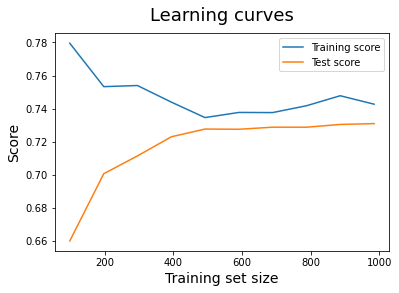

In [46]:
model_2_d = grid_model_2_d.best_estimator_
LearningCurvePlot(estimator=model_2_d, X=X_train_ess, y=y2_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

In [47]:
coef_lasso_ess = model_2_d[1].coef_
coef = pd.DataFrame({'features' : pd.get_dummies(X_train_ess).columns, 'coefs' : coef_lasso_ess})
coef.sort_values('coefs', ascending=False)

,features,coefs
0,YearBuilt,0.868873
11,NaturalGas(kBtu)_mean_property_type,0.539658
4,PropertyGFABuilding(s),0.405584
7,SourceEUI(kBtu/sf)_mean_property_type,0.099633
2,NumberofFloors,0.059308
1,NumberofBuildings,0.046572
12,ComplianceStatus_Compliant,0.043005
9,SteamUse(kBtu)_mean_property_type,0.010477
5,Latitude,0.000000
10,Electricity(kBtu)_mean_property_type,0.000000


## Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [49]:
rf = RandomForestRegressor(random_state = 42)
model_3_ess = make_pipeline(preprocessor_b,
                        rf)
model_3 = make_pipeline(preprocessor_a,
                        rf)

### Target 1 sans EnergyStar Score (ESS)

In [50]:
model_3.fit(X_train, y1_train)
Score(model=model_3, X=X_test, y=y1_test, save=0)

R² : 0.5396440981921758
RMSE : 1.042462001745812


In [51]:
# Nombre d'arbres
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Nombre de features à considérer à chaque split
max_features = ['auto', 'sqrt']

# Nombre maximum de niveau par arbre
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Nombre minimum de données pour split un noeud
min_samples_split = [2, 5, 10]

# Nombre minimum de données par feuille
min_samples_leaf = [1, 2, 4]

# # Méthode de sélection d'échantillons de chaque arbre
bootstrap = [True, False]

# Random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

rf_random_a = RandomizedSearchCV(estimator = model_3, param_distributions = random_grid, n_iter = 100, cv =cv, verbose=2, random_state=42, n_jobs = -1)

In [52]:
%%time
rf_random_a.fit(X_train, y1_train)
Score(model=rf_random_a, X=X_test, y=y1_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.4min finished


R² : 0.5569666397572554
RMSE : 1.0226607570172332
Wall time: 5min 30s


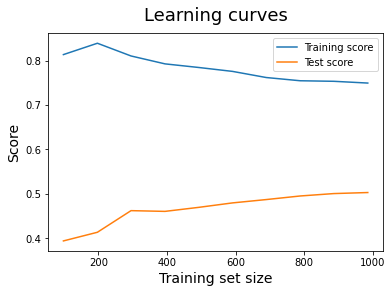

In [53]:
rfr = rf_random_a.best_estimator_
LearningCurvePlot(estimator=rfr, X=X_train, y=y1_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

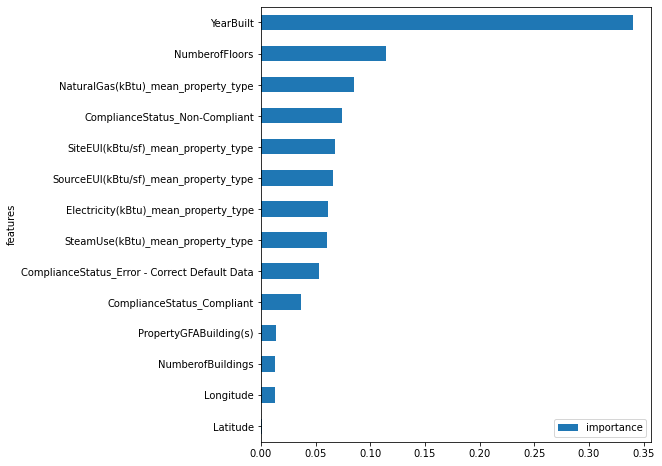

In [54]:
FeatureImportance(data=X_train, model=rfr[1])

### Target 1 avec EnergyStar Score (ESS)

In [55]:
%%time
rf_random_b = RandomizedSearchCV(estimator = model_3_ess, param_distributions = random_grid, n_iter = 100, cv =cv, verbose=2, random_state=42, n_jobs = -1)
rf_random_b.fit(X_train_ess, y1_train)
Score(model=rf_random_b, X=X_test_ess, y=y1_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.5min finished


R² : 0.5804802564281637
RMSE : 0.995152362477313
Wall time: 5min 33s


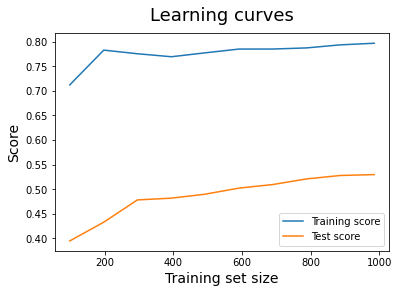

In [56]:
rfr = rf_random_b.best_estimator_
LearningCurvePlot(estimator=rfr, X=X_train_ess, y=y1_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

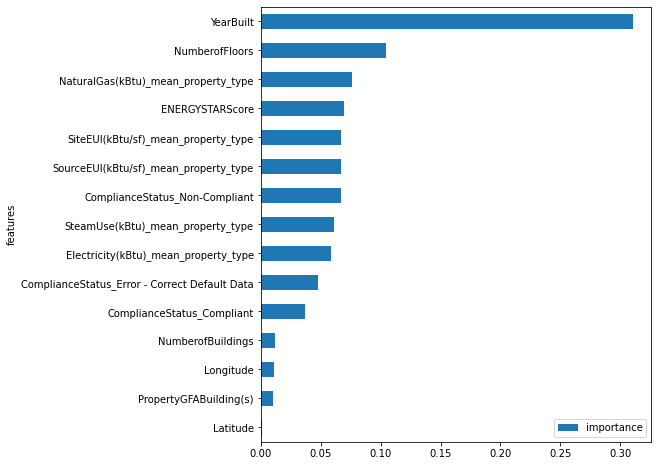

In [57]:
FeatureImportance(data=X_train_ess, model=rfr[1])

### Target 2 sans EnergyStar Score (ESS)

In [58]:
%%time
rf_random_c = RandomizedSearchCV(estimator = model_3, param_distributions = random_grid, n_iter = 100, cv =cv, verbose=2, random_state=42, n_jobs = -1)
rf_random_c.fit(X_train, y2_train)
Score(model=rf_random_c, X=X_test, y=y2_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.6min finished


R² : 0.5744225804505395
RMSE : 1.032297972782435
Wall time: 5min 34s


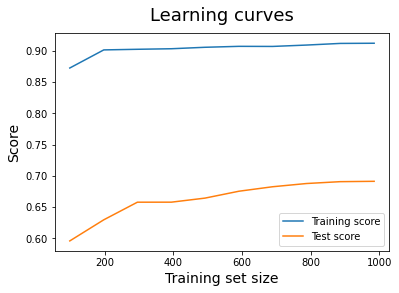

In [59]:
rfr = rf_random_c.best_estimator_
LearningCurvePlot(estimator=rfr, X=X_train, y=y2_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

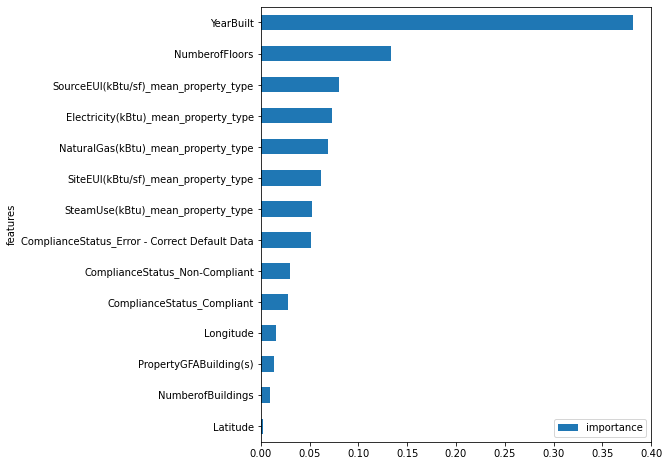

In [60]:
FeatureImportance(data=X_train, model=rfr[1])

### Target 2 avec EnergyStar Score (ESS)

In [61]:
%%time
rf_random_d = RandomizedSearchCV(estimator = model_3_ess, param_distributions = random_grid, n_iter = 100, cv =cv, verbose=2, random_state=42, n_jobs = -1)
rf_random_d.fit(X_train_ess, y2_train)
Score(model=rf_random_d, X=X_test_ess, y=y2_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.9min finished


R² : 0.6075182945995468
RMSE : 0.9913465396180746
Wall time: 5min 56s


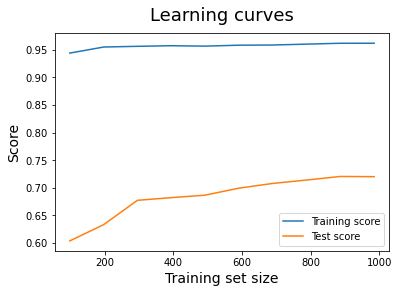

In [62]:
rfr = rf_random_d.best_estimator_
LearningCurvePlot(estimator=rfr, X=X_train_ess, y=y2_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

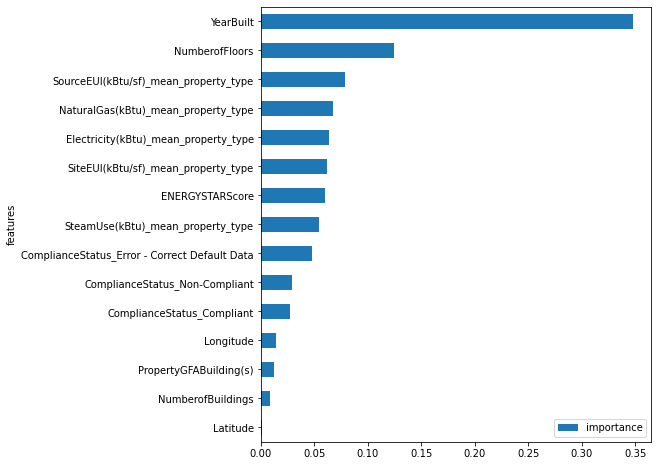

In [63]:
FeatureImportance(data=X_train_ess, model=rfr[1])

## Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

### Target 1 sans EnergyStar Score (ESS)

In [65]:
gbr = GradientBoostingRegressor(random_state=15)

#### Sans paramétrage

In [66]:
model_4 = make_pipeline(preprocessor_a,
                        gbr)

In [67]:
model_4.fit(X_train, y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofBuildings',
                                                   'NumberofFloors']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore...
                                                 

In [68]:
Score(model=model_4, X=X_test, y=y1_test, save=0)

R² : 0.5897714361789036
RMSE : 0.984070752523288


#### Avec paramétrage

In [69]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': range(10,150,5),
               'gradientboostingregressor__learning_rate': [0.1],
               'gradientboostingregressor__min_samples_split': [2],
               'gradientboostingregressor__min_samples_leaf': [1],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt','auto'],
               'gradientboostingregressor__subsample' : [0.8],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train, y1_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 6.2 s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 1,
  'gradientboostingregressor__min_samples_split': 2,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.5181502804741227)

In [70]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145],
               'gradientboostingregressor__learning_rate': [0.1],
               'gradientboostingregressor__min_samples_split': range(2,40,2),
               'gradientboostingregressor__min_samples_leaf': range(1,10,1),               
               'gradientboostingregressor__max_depth' : range(2,8,1),
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.8],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train, y1_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 2min 4s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 7,
  'gradientboostingregressor__min_samples_split': 24,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.5247727366964096)

In [71]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145],
               'gradientboostingregressor__learning_rate': [0.10],
               'gradientboostingregressor__min_samples_split': [24],
               'gradientboostingregressor__min_samples_leaf': [7],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.6,0.7,0.8,0.85,0.9],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train, y1_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 830 ms


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 7,
  'gradientboostingregressor__min_samples_split': 24,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.5247727366964096)

In [72]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145, 290],
               'gradientboostingregressor__learning_rate': [0.10, 0.05],
               'gradientboostingregressor__min_samples_split': [24],
               'gradientboostingregressor__min_samples_leaf': [7],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.6,0.7,0.8,0.85,0.9],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train, y1_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 3.27 s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 7,
  'gradientboostingregressor__min_samples_split': 24,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.5247727366964096)

In [73]:
gsearch1.fit(X_train, y1_train)
Score(model=gsearch1, X=X_test, y=y1_test)

R² : 0.5887468903438416
RMSE : 0.9852988445600103


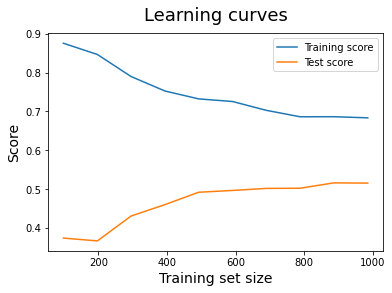

In [74]:
gbr_a = gsearch1.best_estimator_
LearningCurvePlot(estimator=gbr_a, X=X_train, y=y1_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

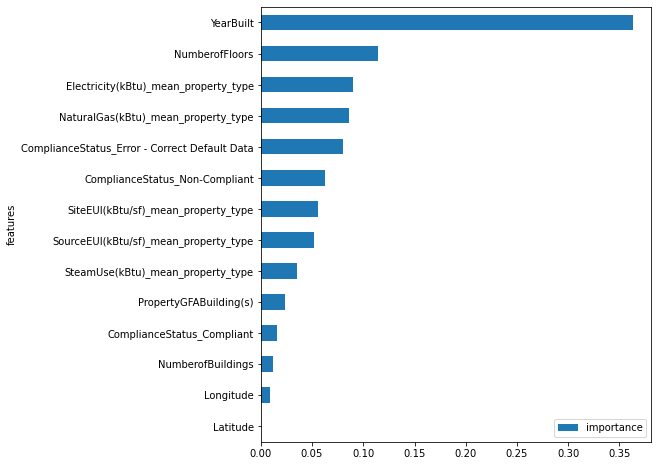

In [75]:
FeatureImportance(data=X_train, model=gbr_a[1])

#### Analyse des erreurs

In [76]:
ComputeError(model=gsearch1, test_data=X_test, target=y1_test)

PrimaryPropertyType
K-12 School                    0.462860
Medical Office                 0.574584
Office                         0.592915
Hotel                          0.601901
Worship Facility               0.650862
Self-Storage Facility          0.684444
Mixed Use Property             0.725369
Retail Store                   0.735587
Refrigerated Warehouse         0.827915
Other                          0.857088
Warehouse                      0.875245
HospitalAndLaboraty            0.912684
University                     0.917669
Residence Hall                 0.920644
Senior Care Community          0.926131
Distribution Center            0.932522
Restaurant                     1.301800
Supermarket / Grocery Store    1.415109
Name: error, dtype: float64

### Target 1 avec EnergyStar Score (ESS)

In [77]:
model_4_b = make_pipeline(preprocessor_b,
                        gbr)

In [78]:
model_4_b.fit(X_train_ess, y1_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PropertyGFABuilding(s)',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'ENERGYSTARScore']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(hand.

In [79]:
Score(model=model_4_b, X=X_test_ess, y=y1_test, save=0)

R² : 0.6235357311458527
RMSE : 0.9427037992131424


In [80]:
%%time


param_test1 = {'gradientboostingregressor__n_estimators': range(10,150,5), # Nombre d'estimateur
               'gradientboostingregressor__learning_rate': [0.1], # Taux d'apprentissage
               'gradientboostingregressor__min_samples_split': [2], # minmum de données par split
               'gradientboostingregressor__min_samples_leaf': [1], # Minimum de données par feuille              
               'gradientboostingregressor__max_depth' : [3], # Profondeur maximum de l'arbre
               'gradientboostingregressor__max_features': ['sqrt'], # Nombre de features à utiliser
               'gradientboostingregressor__subsample' : [0.8], # Proportion du sous-échantillon
               'gradientboostingregressor__random_state' : [15] # Seed              
              }
gsearch1 = GridSearchCV(estimator = model_4_b, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train_ess, y1_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 2.29 s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 1,
  'gradientboostingregressor__min_samples_split': 2,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.5540358470660363)

In [81]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145],
               'gradientboostingregressor__learning_rate': [0.1],
               'gradientboostingregressor__min_samples_split': range(2,40,2),
               'gradientboostingregressor__min_samples_leaf': range(1,10,1),               
               'gradientboostingregressor__max_depth' : range(2,8,1),
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.8],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4_b, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train_ess, y1_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 2min 3s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 6,
  'gradientboostingregressor__min_samples_split': 2,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.5624553191293916)

In [82]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145],
               'gradientboostingregressor__learning_rate': [0.10],
               'gradientboostingregressor__min_samples_split': [2],
               'gradientboostingregressor__min_samples_leaf': [6],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.6,0.7,0.8,0.85,0.9],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4_b, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train_ess, y1_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 767 ms


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 6,
  'gradientboostingregressor__min_samples_split': 2,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.6},
 0.5647711724975795)

In [83]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145,290],
               'gradientboostingregressor__learning_rate': [0.05, 0.1],
               'gradientboostingregressor__min_samples_split': [2],
               'gradientboostingregressor__min_samples_leaf': [6],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.6],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4_b, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train_ess, y1_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 792 ms


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 6,
  'gradientboostingregressor__min_samples_split': 2,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.6},
 0.5647711724975795)

In [84]:
gsearch1.fit(X_train_ess, y1_train)
Score(model=gsearch1, X=X_test_ess, y=y1_test)

R² : 0.6081061501417525
RMSE : 0.9618284081581177


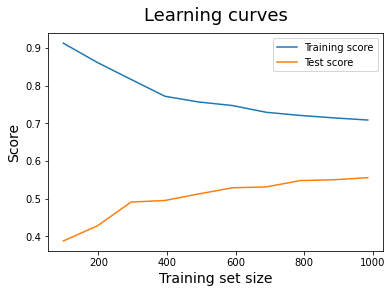

In [85]:
gbr = gsearch1.best_estimator_
LearningCurvePlot(estimator=gbr, X=X_train_ess, y=y1_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

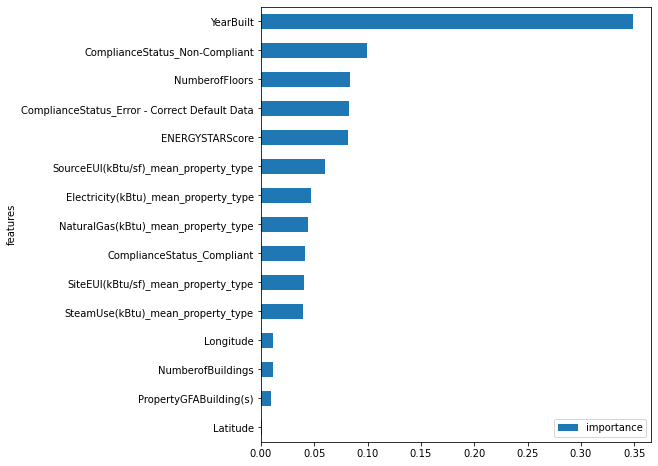

In [86]:
FeatureImportance(data=X_train_ess, model=gbr[1])

### Target 2 sans EnergyStar Score (ESS)

#### Sans paramétrage

In [87]:
model_4.fit(X_train, y2_train)
Score(model=model_4, X=X_test, y=y2_test, save=0)

R² : 0.5950962344549391
RMSE : 1.0069124108262508


#### Avec paramétrage

In [88]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': range(10,150,5),
               'gradientboostingregressor__learning_rate': [0.1],
               'gradientboostingregressor__min_samples_split': [2],
               'gradientboostingregressor__min_samples_leaf': [1],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.8],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train, y2_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 2.33 s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 1,
  'gradientboostingregressor__min_samples_split': 2,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.68987207548655)

In [89]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145],
               'gradientboostingregressor__learning_rate': [0.1],
               'gradientboostingregressor__min_samples_split': range(2,40,2),
               'gradientboostingregressor__min_samples_leaf': range(1,10,1),               
               'gradientboostingregressor__max_depth' : range(2,8,1),
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.8],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train, y2_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 2min 3s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 1,
  'gradientboostingregressor__min_samples_split': 16,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.6970589273838866)

In [90]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145],
               'gradientboostingregressor__learning_rate': [0.10],
               'gradientboostingregressor__min_samples_split': [16],
               'gradientboostingregressor__min_samples_leaf': [1],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.6,0.7,0.8,0.85,0.9],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train, y2_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 776 ms


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 1,
  'gradientboostingregressor__min_samples_split': 16,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.6},
 0.7001704008079921)

In [91]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [145, 290],
               'gradientboostingregressor__learning_rate': [0.05, 0.10],
               'gradientboostingregressor__min_samples_split': [16],
               'gradientboostingregressor__min_samples_leaf': [1],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.6],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train, y2_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 826 ms


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 1,
  'gradientboostingregressor__min_samples_split': 16,
  'gradientboostingregressor__n_estimators': 145,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.6},
 0.7001704008079921)

In [92]:
Score(model=gsearch1, X=X_test, y=y2_test)

R² : 0.5919336488256519
RMSE : 1.010837112150731


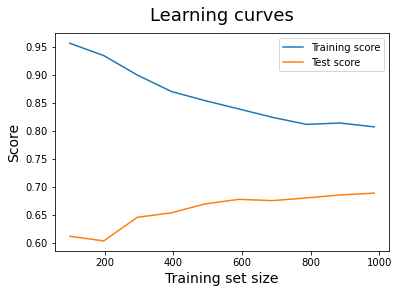

In [93]:
gbr = gsearch1.best_estimator_
LearningCurvePlot(estimator=gbr, X=X_train, y=y2_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

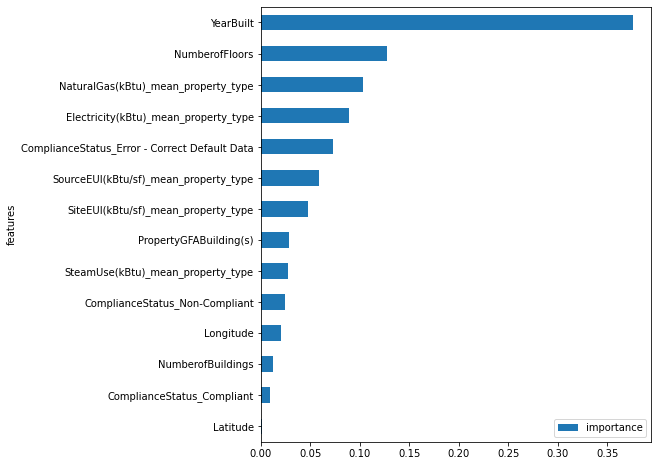

In [94]:
FeatureImportance(data=X_train, model=gbr[1])

#### Analyse des erreurs

In [95]:
ComputeError(model=gsearch1, test_data=X_test, target=y2_test)

PrimaryPropertyType
Supermarket / Grocery Store    0.313725
Office                         0.371728
Worship Facility               0.384909
Hotel                          0.386181
Residence Hall                 0.396569
University                     0.409546
Mixed Use Property             0.444804
Refrigerated Warehouse         0.474045
Retail Store                   0.487051
K-12 School                    0.494121
Medical Office                 0.539435
HospitalAndLaboraty            0.588498
Senior Care Community          0.648775
Warehouse                      0.652931
Distribution Center            0.755905
Self-Storage Facility          0.850614
Other                          0.868855
Restaurant                     1.076984
Name: error, dtype: float64

### Target 2 avec EnergyStar Score (ESS)

In [96]:
model_4_b.fit(X_train_ess, y2_train)
Score(model=model_4_b, X=X_test_ess, y=y2_test, save=0)

R² : 0.6159393519657154
RMSE : 0.9806537450142986


In [97]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': range(10,150,5),
               'gradientboostingregressor__learning_rate': [0.1],
               'gradientboostingregressor__min_samples_split': [2],
               'gradientboostingregressor__min_samples_leaf': [1],               
               'gradientboostingregressor__max_depth' : [3],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.8],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4_b, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train_ess, y2_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 2.3 s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 3,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 1,
  'gradientboostingregressor__min_samples_split': 2,
  'gradientboostingregressor__n_estimators': 130,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.7420167026601086)

In [98]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [130],
               'gradientboostingregressor__learning_rate': [0.1],
               'gradientboostingregressor__min_samples_split': range(2,40,2),
               'gradientboostingregressor__min_samples_leaf': range(1,10,1),               
               'gradientboostingregressor__max_depth' : range(2,8,1),
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.8],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4_b, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train_ess, y2_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 2min 2s


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 4,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 3,
  'gradientboostingregressor__min_samples_split': 14,
  'gradientboostingregressor__n_estimators': 130,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.7493351160619177)

In [99]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [130],
               'gradientboostingregressor__learning_rate': [0.1],
               'gradientboostingregressor__min_samples_split': [14],
               'gradientboostingregressor__min_samples_leaf': [3],               
               'gradientboostingregressor__max_depth' : [4],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.6,0.7,0.8,0.85,0.9],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4_b, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train_ess, y2_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 879 ms


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 4,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 3,
  'gradientboostingregressor__min_samples_split': 14,
  'gradientboostingregressor__n_estimators': 130,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.7493351160619177)

In [100]:
%%time
param_test1 = {'gradientboostingregressor__n_estimators': [130, 260],
               'gradientboostingregressor__learning_rate': [0.1,0.05],
               'gradientboostingregressor__min_samples_split': [14],
               'gradientboostingregressor__min_samples_leaf': [3],               
               'gradientboostingregressor__max_depth' : [4],
               'gradientboostingregressor__max_features': ['sqrt'],
               'gradientboostingregressor__subsample' : [0.8],
               'gradientboostingregressor__random_state' : [15]               
              }
gsearch1 = GridSearchCV(estimator = model_4_b, param_grid = param_test1, cv =cv, verbose=0, scoring='r2', n_jobs = -1)
gsearch1.fit(X_train_ess, y2_train)
gsearch1.best_params_, gsearch1.best_score_

Wall time: 979 ms


({'gradientboostingregressor__learning_rate': 0.1,
  'gradientboostingregressor__max_depth': 4,
  'gradientboostingregressor__max_features': 'sqrt',
  'gradientboostingregressor__min_samples_leaf': 3,
  'gradientboostingregressor__min_samples_split': 14,
  'gradientboostingregressor__n_estimators': 130,
  'gradientboostingregressor__random_state': 15,
  'gradientboostingregressor__subsample': 0.8},
 0.7493351160619177)

In [101]:
gsearch1.fit(X_train_ess, y2_train)
Score(model=gsearch1, X=X_test_ess, y=y2_test)

R² : 0.6249464471516286
RMSE : 0.9690862418836749


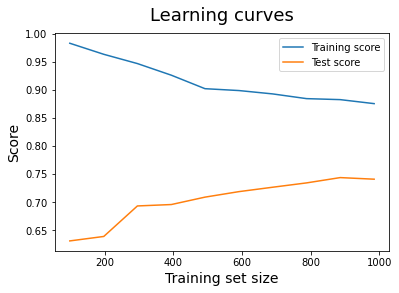

In [102]:
gbr = gsearch1.best_estimator_
LearningCurvePlot(estimator=gbr, X=X_train_ess, y=y2_train, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

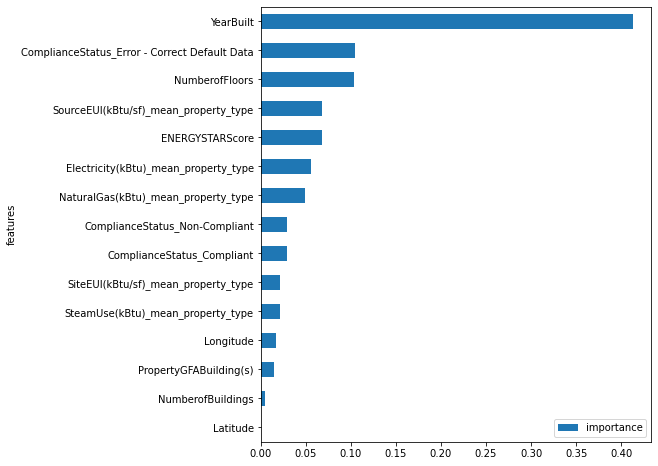

In [103]:
FeatureImportance(data=X_train_ess, model=gbr[1])

## Résumé des scores

### Création du dataframe pour résumer les scores

In [105]:
# Création d'un DataFrame avec la performance de chaque modèle en exploitant les résultats de la fonction Score()

dummy_target = [1,2]
models_target = [1,1,2,2]*4
target = dummy_target + models_target

ESS_dummy = [0,0]
ESS_models = [0,1,0,1]*4
ESS_bin = ESS_dummy + ESS_models

index = ['Dummy Regressor'] * 2 + ['Regression linéaire'] * 4 + ['Lasso'] * 4 + ['Random Forest'] * 4 + ['Gradient Boosting'] * 4

recap = pd.DataFrame({
    'index' : index,
    'RMSE' : RMSE,
    'R²' : R2,
    'Target' : target,
    'ESS' : ESS_bin
}).set_index('index')

recap.head()

,RMSE,R²,Target,ESS
index,,,,
Dummy Regressor,1.537669,-0.001611,1,0
Dummy Regressor,1.582450,-0.000065,2,0
Regression linéaire,1.002069,0.574629,1,0
Regression linéaire,0.973887,0.598218,1,1
Regression linéaire,1.019071,0.585259,2,0


In [113]:
recap

,RMSE,R²,Target,ESS
index,,,,
Dummy Regressor,1.537669,-0.001611,1,Sans ESS
Dummy Regressor,1.582450,-0.000065,2,Sans ESS
Regression linéaire,1.002069,0.574629,1,Sans ESS
Regression linéaire,0.973887,0.598218,1,Avec ESS
Regression linéaire,1.019071,0.585259,2,Sans ESS
Regression linéaire,0.983569,0.613652,2,Avec ESS
Lasso,1.002053,0.574642,1,Sans ESS
Lasso,0.974334,0.597849,1,Avec ESS
Lasso,1.028422,0.577612,2,Sans ESS


In [106]:
recap['ESS'] = recap.ESS.replace({
    0 : 'Sans ESS',
    1 : 'Avec ESS'
})

In [107]:
recap_nod = recap.drop('Dummy Regressor')
recap_1 = recap_nod[recap_nod.Target == 1]
recap_2 = recap_nod[recap_nod.Target == 2]

### RMSE : Target 1 

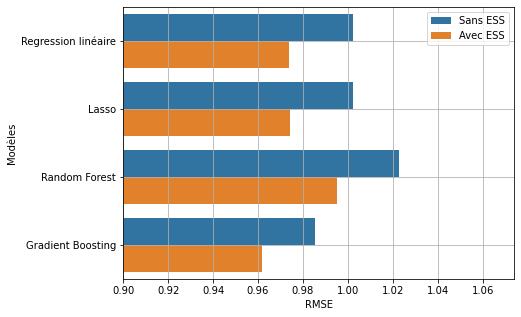

In [108]:
PlotScore(indicator='RMSE', data=recap_1, size=(7,5), starting=0.9)

### RMSE : Target 2

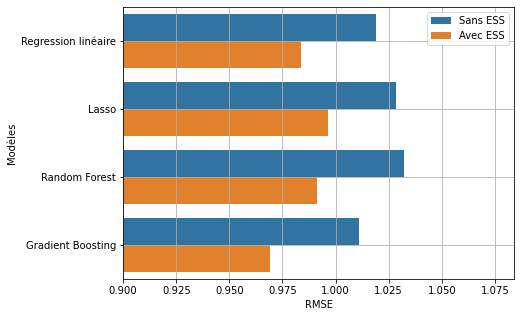

In [109]:
PlotScore(indicator='RMSE', data=recap_2, size=(7,5), starting=0.9)

### R² : Target 1 

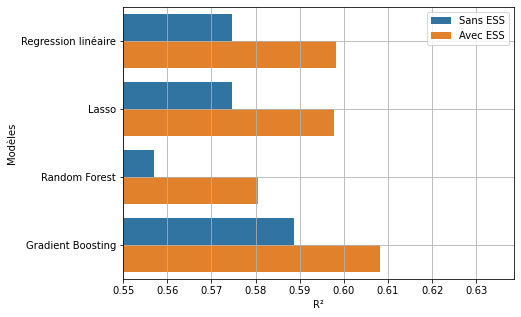

In [110]:
PlotScore(indicator='R²', data=recap_1, size=(7,5), starting=0.55)

### R² : Target 2

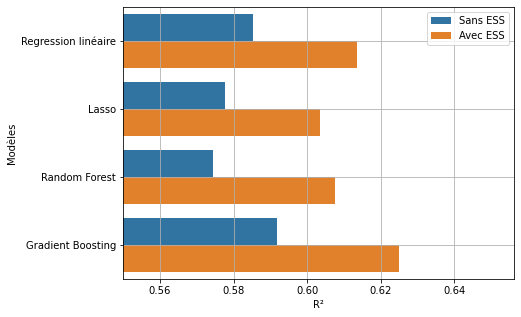

In [111]:
PlotScore(indicator='R²', data=recap_2, size=(7,5), starting=0.55)

### Plot avec un axe x commençant à 0

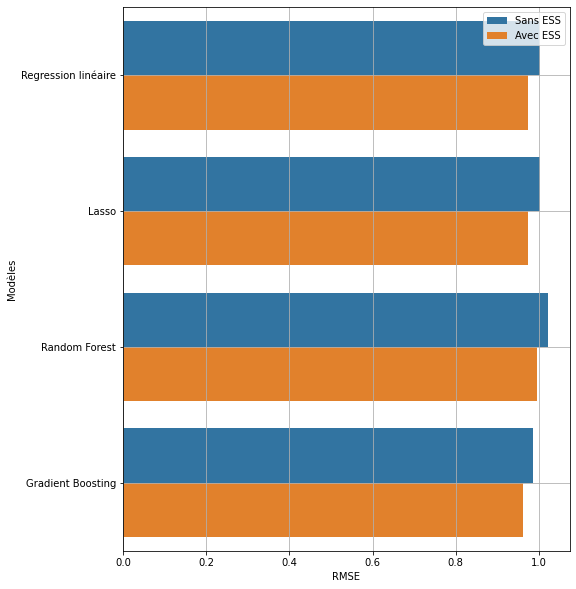

In [112]:
PlotScore(indicator='RMSE', data=recap_1, size=(8,10), starting=0)